In [1]:
import numpy as np
import pandas as pd

df1 = pd.read_csv('HW7Q1.csv')
df2 = pd.read_csv('HW7Q2Q3.csv')

## Question 1

In [2]:
from sklearn.decomposition import TruncatedSVD
from sklearn.impute import SimpleImputer

# Impute missing values using the mean of each movie
imputer = SimpleImputer(strategy='mean')
ratings_imputed = imputer.fit_transform(df1)

# Define a function to perform SVD and return estimated ratings
def estimate_ratings(n_factors):
    svd = TruncatedSVD(n_components=n_factors, random_state=42)
    ratings_svd = svd.fit_transform(ratings_imputed)
    ratings_estimated = svd.inverse_transform(ratings_svd)
    return ratings_estimated

# Estimate ratings for different numbers of factors
estimated_ratings = {}
for factors in [2, 3, 6]:
    estimated_ratings[factors] = estimate_ratings(factors)

# Extract estimated ratings for User_4 for the first three movies
user_4_ratings_estimates = {factors: estimated_ratings[factors][:3, 3] for factors in [2, 3, 6]}
user_4_ratings_estimates


{2: array([3.11667204, 2.77227762, 3.19463869]),
 3: array([3.49350225, 2.74018941, 2.78290079]),
 6: array([3.2240067 , 2.67912949, 3.04725507])}

## Question 2

### (a)

In [3]:
from sklearn.cluster import KMeans
import numpy as np

# Remove the 'MONTH' column as it's not part of the features for clustering
features = df2.drop('MONTH', axis=1)

# Perform K-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(features)

# The cluster labels for each day
cluster_labels = kmeans.labels_

# Calculate the number of days in each cluster
unique, counts = np.unique(cluster_labels, return_counts=True)
cluster_counts = dict(zip(unique, counts))

# Display the number of days in each cluster
cluster_counts


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


{0: 425, 1: 303}

Cluster 0 contains 425 days.
Cluster 1 contains 303 days.

### (b)

In [4]:
from sklearn.decomposition import PCA

# Initialize PCA for first three principal components
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(features)

# K-means clustering on the reduced data
kmeans_pca = KMeans(n_clusters=2, random_state=42)
kmeans_pca.fit(reduced_data)

# Cluster labels for each day after PCA
cluster_labels_pca = kmeans_pca.labels_

# Calculate the number of days in each cluster after PCA
unique_pca, counts_pca = np.unique(cluster_labels_pca, return_counts=True)
cluster_counts_pca = dict(zip(unique_pca, counts_pca))

cluster_counts_pca


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


{0: 303, 1: 425}

## Question 3

### (a)

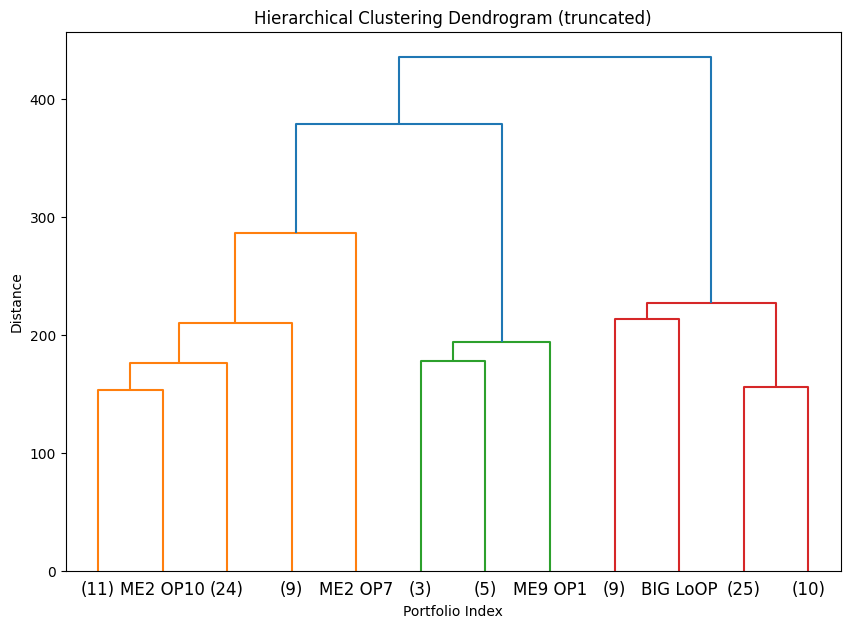

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Transpose the data to have portfolios as rows and days as columns
portfolio_data = features.transpose()

# Apply hierarchical clustering using the linkage method
linked = linkage(portfolio_data, method='ward')

import matplotlib.pyplot as plt

# Now that matplotlib is imported, let's plot the dendrogram again
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=portfolio_data.index,
           distance_sort='descending',
           show_leaf_counts=True,
           truncate_mode='lastp',  # show only the last p merged clusters
           p=12,  # show only the last 12 merged clusters
)
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Portfolio Index')
plt.ylabel('Distance')
plt.show()


You can see that the last three to four merges happen at a much higher distance than the rest, which indicates that "3" could be a reasonable choice for the number of clusters.

### (b)

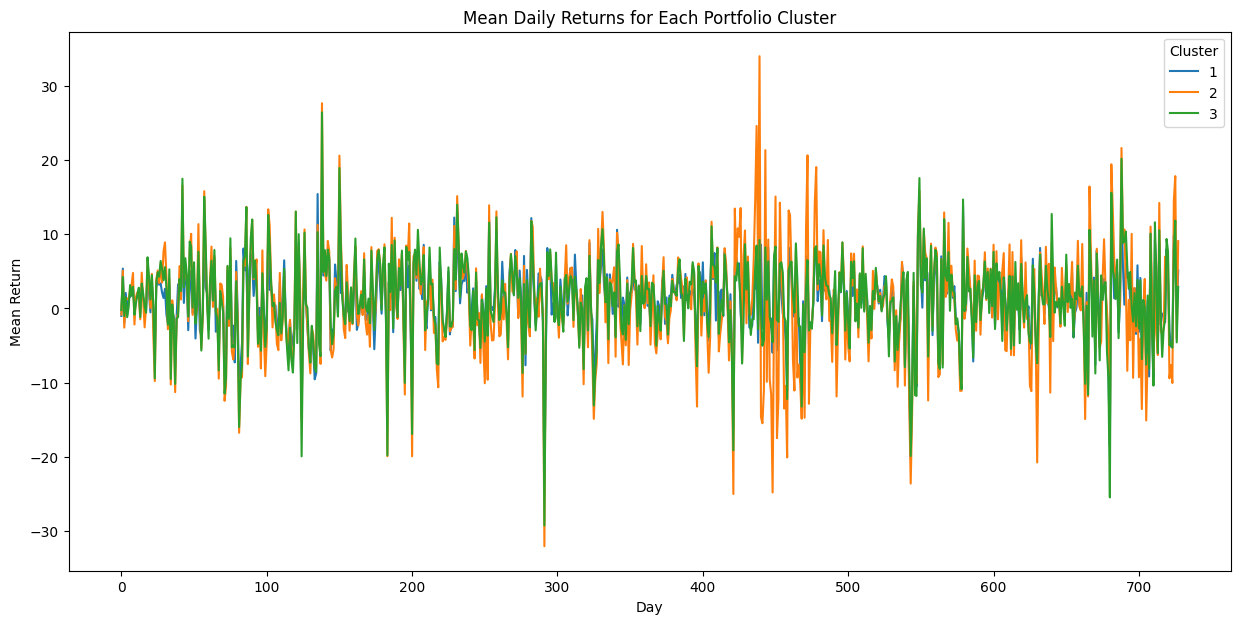

1    45
2     9
3    46
Name: count, dtype: int64

In [6]:
from scipy.cluster.hierarchy import fcluster

# Determine clusters by cutting the dendrogram in 3 clusters
# Use the maximum distance observed between clusters
max_d = linked[-3, 2]

# Obtain the cluster labels for each portfolio
clusters = fcluster(linked, max_d, criterion='distance')

# Calculate the mean return for each cluster
cluster_means = portfolio_data.groupby(clusters).mean().T

# Plot the means for each cluster
cluster_means.plot(figsize=(15, 7))
plt.title('Mean Daily Returns for Each Portfolio Cluster')
plt.xlabel('Day')
plt.ylabel('Mean Return')
plt.legend(title='Cluster')
plt.show()

# Display the number of portfolios in each cluster
pd.Series(clusters).value_counts().sort_index()


Cluster 1 has 45 portfolios.
Cluster 2 has 9 portfolios.
Cluster 3 has 46 portfolios.

### (C)

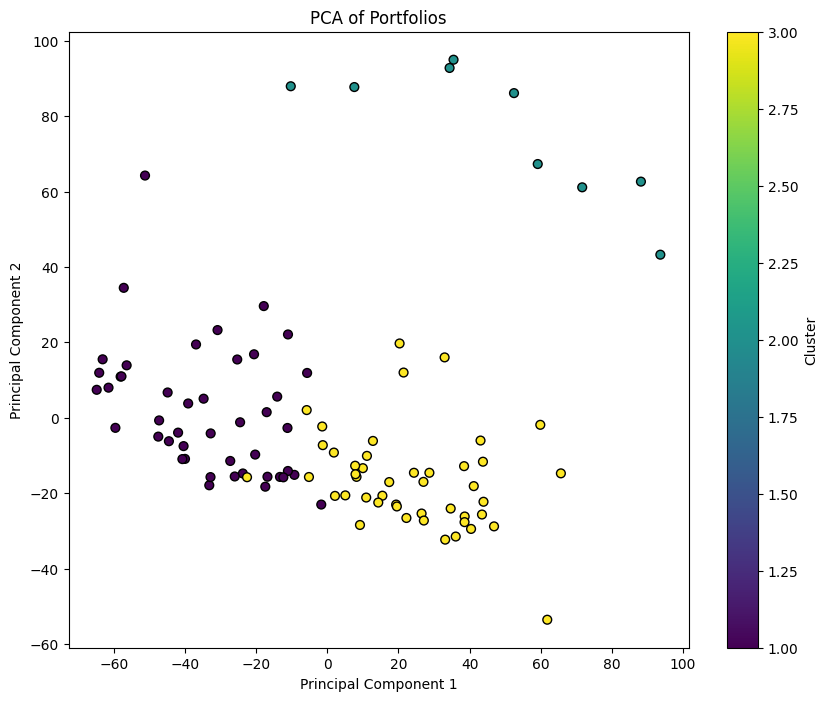

In [7]:
# Run PCA for the portfolio data
pca = PCA(n_components=2)
pca_transformed_data = pca.fit_transform(portfolio_data)

# Visualize the portfolios on the first two principal components
plt.figure(figsize=(10, 8))
plt.scatter(pca_transformed_data[:, 0], pca_transformed_data[:, 1], c=clusters, cmap='viridis', edgecolor='k', s=40)
plt.title('PCA of Portfolios')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()
